In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

In [2]:
df = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\berlin_final.csv")
df_w = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\berlin_weather.csv")

**Trip Count**

Monthly

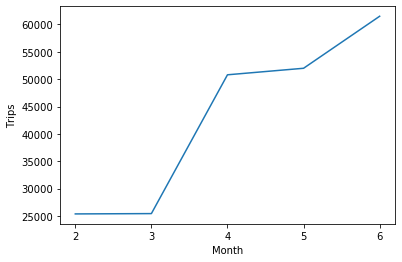

In [3]:
data_m = pd.DataFrame()
data_m['month'] = df.month.value_counts()
data_m.sort_index(inplace=True)
plt.plot(data_m.index, data_m.month, label='Trips in each Month')
plt.ylabel('Trips')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig(r'D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Jan\Rental Patterns\trip_month.png', format='png')
plt.show()

Weekday

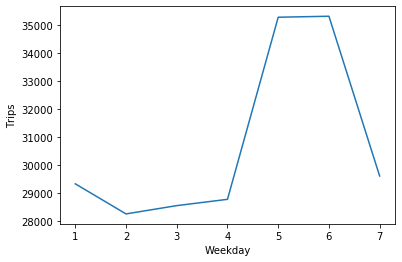

In [4]:
data_w = pd.DataFrame()
data_w['weekday'] = df.weekday.value_counts()
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.weekday, label='Trips on each Weekday')
plt.ylabel('Trips')
plt.xlabel('Weekday')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_weekday.png')
plt.show()

Daily

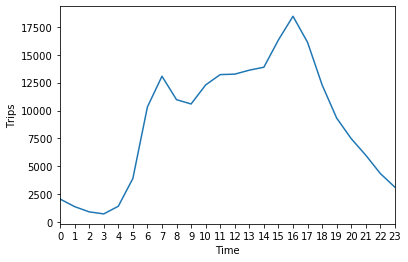

In [5]:
data_d = pd.DataFrame()
data_d['hour'] = df.hour.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.hour, label='Trips in each hour')
plt.ylabel('Trips')
plt.xlabel('Time')
plt.xlim(0, 23)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_hour.png')
plt.show()

Temperature

In [6]:
def replace_minutes(dt):
    return dt.replace(minute=0)

In [7]:
df.rename(columns={'day':'datetime'}, inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df_w.datetime = pd.to_datetime(df_w.datetime)
# df.datetime = df['datetime'].astype('datetime64')

In [8]:
# type(df.datetime[0])
# df.datetime = df.datetime.replace(minute=0)
df.datetime = df.datetime.apply(replace_minutes)

In [9]:
df = pd.merge(df, df_w, how="left", on =["datetime"])

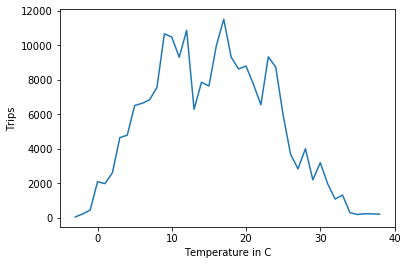

In [10]:
data_t = pd.DataFrame()
df.temperature = df.temperature.astype(int)
data_t['temp'] = df.temperature.value_counts()
data_t.sort_index(inplace=True)
plt.plot(data_t.index, data_t.temp, label='Trips fro each Temperature')
plt.ylabel('Trips')
plt.xlabel('Temperature in C')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_temp.png')
plt.show()

Precipitation

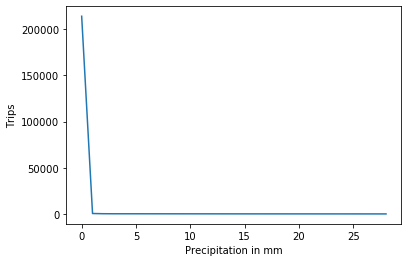

In [11]:
data_p = pd.DataFrame()
df.precipitation = df.precipitation.astype(int)
data_p['prec'] = df.precipitation.value_counts()
data_p.sort_index(inplace=True)
plt.plot(data_p.index, data_p.prec, label='Trips fro each Precipitation')
plt.ylabel('Trips')
plt.xlabel('Precipitation in mm')
# plt.yscale('log')
# plt.gca().xaxis.s
# et_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_prec.png')
plt.show()

In [12]:
del data_m
del data_w
del data_d
del data_t
del data_p

**Duration**

Monthly

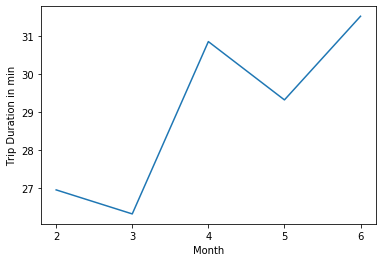

In [13]:
data_du_m = pd.DataFrame()
data_du_m = df[['month', 'trip_duration']]
data_du_m = data_du_m.groupby([data_du_m.month]).mean()

data_du_m.sort_index(inplace=True)
plt.plot(data_du_m.index, data_du_m.trip_duration, label='Mean trip duration each month')
plt.ylabel('Trip Duration in min')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_duration_month.png')
plt.show()

Weekday

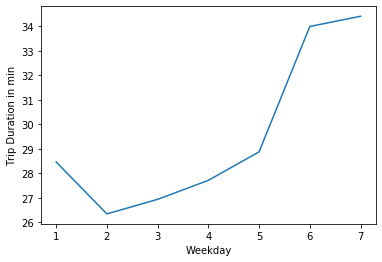

In [14]:
data_du_w = pd.DataFrame()
data_du_w = df[['weekday', 'trip_duration']]
data_du_w = data_du_w.groupby([data_du_w.weekday]).mean()

data_du_w.sort_index(inplace=True)
plt.plot(data_du_w.index, data_du_w.trip_duration, label='Mean trip duration each weekday')
plt.ylabel('Trip Duration in min')
plt.xlabel('Weekday')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_duration_weekday.png')
plt.show()

Daily

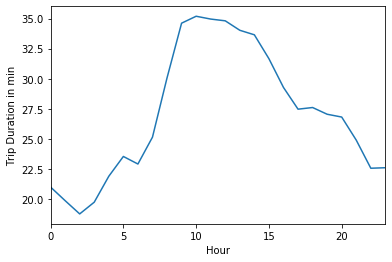

In [15]:
data_du_d = pd.DataFrame()
data_du_d = df[['hour', 'trip_duration']]
data_du_d = data_du_d.groupby([data_du_d.hour]).mean()

data_du_d.sort_index(inplace=True)
plt.plot(data_du_d.index, data_du_d.trip_duration, label='Mean trip duration each hour')
plt.ylabel('Trip Duration in min')
plt.xlabel('Hour')
plt.xlim(0, 23)
plt.savefig('trip_duration_hourly.png')
plt.show()

Temperature

Frankfurt: -4 Ist edge case mit 2 fahrten, eine mit 12 min, die andere mit 97 min duration

In [16]:
# df_t = df[df['temperature']== -4]

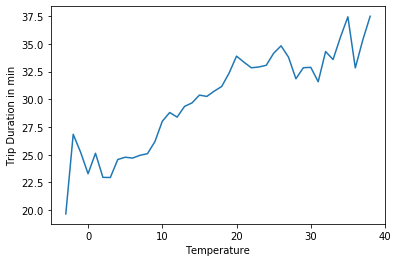

In [17]:
data_du_t = pd.DataFrame()
data_du_t = df[['temperature', 'trip_duration']]
data_du_t = data_du_t.groupby([data_du_t.temperature]).mean()

data_du_t.sort_index(inplace=True)
plt.plot(data_du_t.index, data_du_t.trip_duration, label='Mean trip duration for each temperature')
plt.ylabel('Trip Duration in min')
plt.xlabel('Temperature')
plt.savefig('trip_duration_temp.png')
plt.show()

Precipitation

Frankfurt: 4 and 8 are edge cases with 13 and 8 trips with unusual long trips

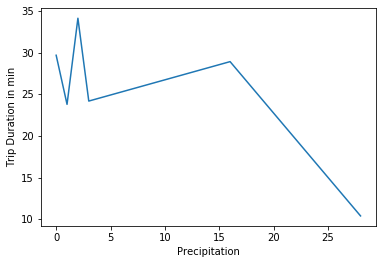

In [18]:
data_du_p = pd.DataFrame()
data_du_p = df[['precipitation', 'trip_duration']]
data_du_p = data_du_p.groupby([data_du_p.precipitation]).mean()

data_du_p.sort_index(inplace=True)
plt.plot(data_du_p.index, data_du_p.trip_duration, label='Mean trip duration for each precipitation')
plt.ylabel('Trip Duration in min')
plt.xlabel('Precipitation')
plt.savefig('trip_duration_prec.png')
plt.show()

In [19]:
# df_t = df[df['precipitation']>3]
# df_t = df_t[['month',
#             'date',
#             'hour',
#             'min',
#             'b_number',
#             'trip_duration',
#             'precipitation']]

In [20]:
del data_du_m
del data_du_w
del data_du_d
del data_du_t
del data_du_p

**Distance**

Monthly

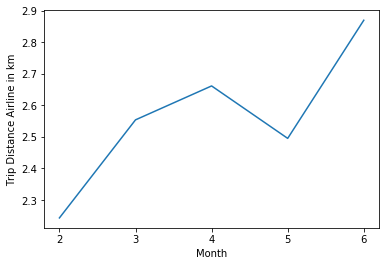

In [21]:
data_di_m = pd.DataFrame()
data_di_m = df[['month', 'distance']]
data_di_m = data_di_m.groupby([data_di_m.month]).mean()

data_di_m.sort_index(inplace=True)
plt.plot(data_di_m.index, data_di_m.distance, label='Mean trip distance each month')
plt.ylabel('Trip Distance Airline in km')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_distance_month.png')
plt.show()

Weekday

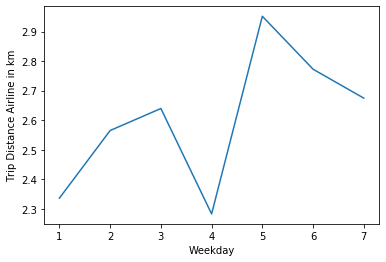

In [22]:
data_di_w = pd.DataFrame()
data_di_w = df[['weekday', 'distance']]
data_di_w = data_di_w.groupby([data_di_w.weekday]).mean()

data_di_w.sort_index(inplace=True)
plt.plot(data_di_w.index, data_di_w.distance, label='Mean trip distance each weekday')
plt.ylabel('Trip Distance Airline in km')
plt.xlabel('Weekday')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_distance_weekday.png')
plt.show()

Daily

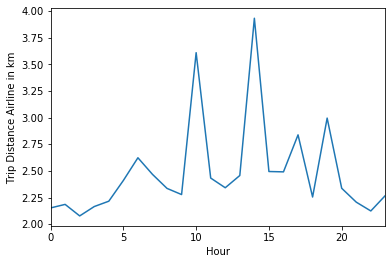

In [23]:
data_di_d = pd.DataFrame()
data_di_d = df[['hour', 'distance']]
data_di_d = data_di_d.groupby([data_di_d.hour]).mean()

data_di_d.sort_index(inplace=True)
plt.plot(data_di_d.index, data_di_d.distance, label='Mean trip distance each hour')
plt.ylabel('Trip Distance Airline in km')
plt.xlabel('Hour')
plt.xlim(0, 23)
plt.savefig('trip_distance_hourly.png')
plt.show()

Temperature

Frankfurt: -4 Ist edge case mit 2 fahrten, eine mit 12 min, die andere mit 97 min duration

Berlin: 8000 km outlier at 26 degrees

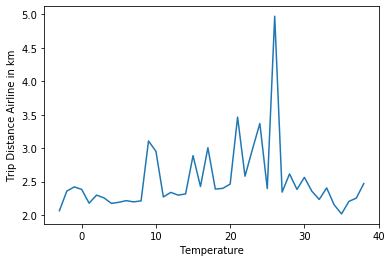

In [24]:
data_di_t = pd.DataFrame()
data_di_t = df[['temperature', 'distance']]
data_di_t = data_di_t.groupby([data_di_t.temperature]).mean()

data_di_t.sort_index(inplace=True)
plt.plot(data_di_t.index, data_di_t.distance, label='Mean trip distance for each temperature')
plt.ylabel('Trip Distance Airline in km')
plt.xlabel('Temperature')
plt.savefig('trip_distance_temp.png')
plt.show()

In [25]:
# df_t = df[df['temperature']== -4]

Precipitation

Frankfurt: 4 and 8 are edge cases with 13 and 8 trips with unusual long trips

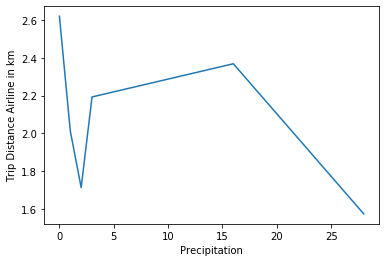

In [26]:
data_di_p = pd.DataFrame()
data_di_p = df[['precipitation', 'distance']]
data_di_p = data_di_p.groupby([data_di_p.precipitation]).mean()

data_di_p.sort_index(inplace=True)
plt.plot(data_di_p.index, data_di_p.distance, label='Mean trip distance for each precipitation')
plt.ylabel('Trip Distance Airline in km')
plt.xlabel('Precipitation')
plt.savefig('trip_distance_prec.png')
plt.show()

In [27]:
del data_di_m
del data_di_w
del data_di_d
del data_di_t
del data_di_p